In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import seaborn as sb
import missingno as msn
sb.set()

In [2]:
train = pd.read_csv('C:/Users/Jitender kumar/Desktop/Data/train1.csv')

train.head()

,DATE,TIME,DT,WD_WS,VISIBILITY,WEATHER,LOWEST_CLOUD,LOW_CLOUD,MID_CLOUD,CURRENT_TEMP,DEW_POINT
0,03-01-2017,631,30630,310/04,1000,BR,0,NSC,0,16,13
1,04-01-2017,701,30700,280/05,1000,FU,0,NSC,0,18,13
2,05-01-2017,731,30730,290/04,1100,FU,0,NSC,0,20,13
3,06-01-2017,731,30730,290/04,1100,FU,0,NSC,0,20,13
4,07-01-2017,801,30800,290/04,1200,FU,0,NSC,0,21,13


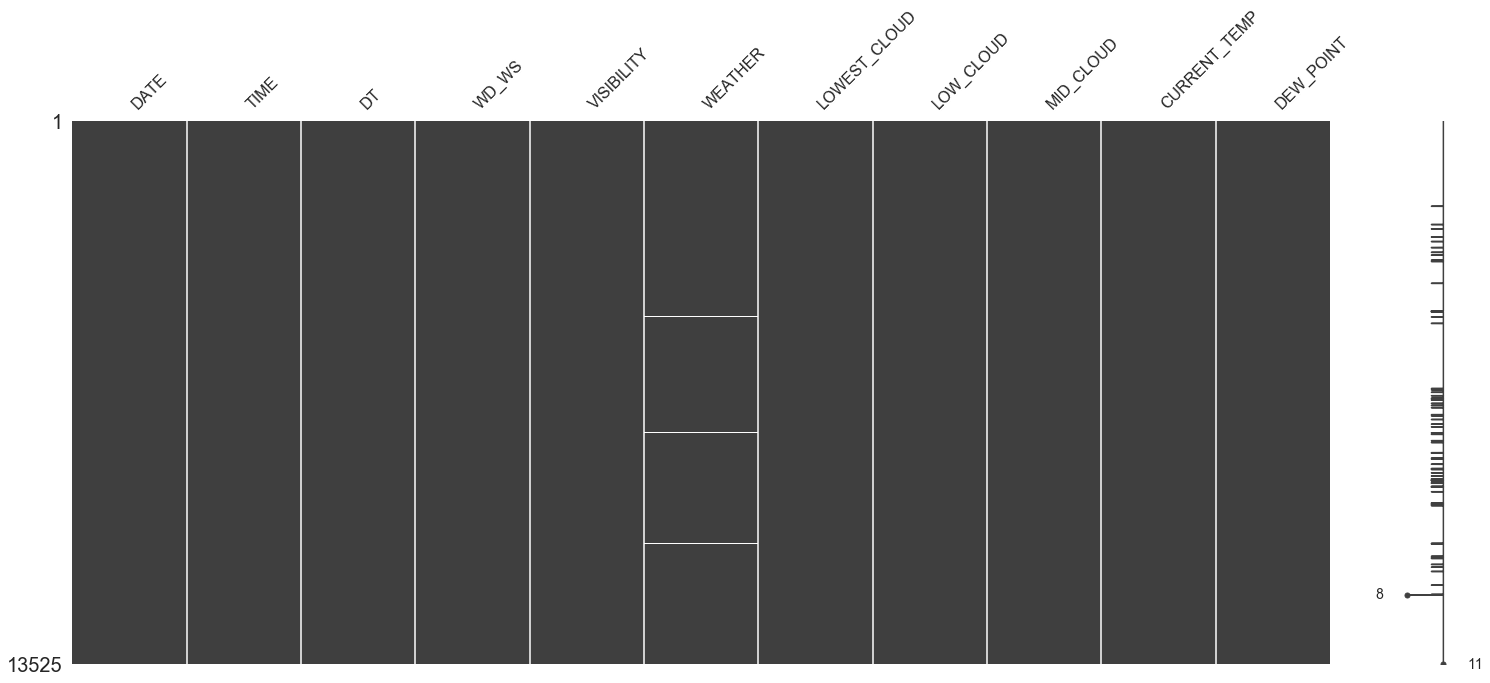

In [3]:
msn.matrix(train)

In [4]:
train.isnull().sum()

DATE             49
TIME              0
DT                0
WD_WS             0
VISIBILITY        1
WEATHER         103
LOWEST_CLOUD      1
LOW_CLOUD         0
MID_CLOUD         0
CURRENT_TEMP      0
DEW_POINT         1
dtype: int64

In [5]:

train['DEW_POINT'].value_counts()

10     1473
7      1364
8      1337
9      1310
6      1098
12     1030
11      982
13      980
14      838
5       826
4       527
15      507
16      366
3       339
2       157
17      152
18      102
1        60
19       24
M01      20
20       13
0        12
M02       5
21        2
Name: DEW_POINT, dtype: int64

In [6]:
train = train.replace(to_replace = "M01", value =-1)
train = train.replace(to_replace = "M02", value =-2)
train = train.replace(to_replace = "CALM", value =0)
train = train.replace(to_replace = "CALM CALM", value =0)

train.head()

,DATE,TIME,DT,WD_WS,VISIBILITY,WEATHER,LOWEST_CLOUD,LOW_CLOUD,MID_CLOUD,CURRENT_TEMP,DEW_POINT
0,03-01-2017,631,30630,310/04,1000,BR,0,NSC,0,16,13
1,04-01-2017,701,30700,280/05,1000,FU,0,NSC,0,18,13
2,05-01-2017,731,30730,290/04,1100,FU,0,NSC,0,20,13
3,06-01-2017,731,30730,290/04,1100,FU,0,NSC,0,20,13
4,07-01-2017,801,30800,290/04,1200,FU,0,NSC,0,21,13


In [7]:
train.info()
train.to_csv("C:\\Users\\Jitender kumar\\Desktop\\train.csv", index=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13525 entries, 0 to 13524
Data columns (total 11 columns):
DATE            13476 non-null object
TIME            13525 non-null object
DT              13525 non-null object
WD_WS           13525 non-null object
VISIBILITY      13524 non-null object
WEATHER         13422 non-null object
LOWEST_CLOUD    13524 non-null object
LOW_CLOUD       13525 non-null object
MID_CLOUD       13525 non-null object
CURRENT_TEMP    13525 non-null int64
DEW_POINT       13524 non-null object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [8]:
DP = pd.DataFrame(train['DEW_POINT'])
DP.isnull().sum()

DEW_POINT    1
dtype: int64

In [9]:
DP = DP.infer_objects()
DP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13525 entries, 0 to 13524
Data columns (total 1 columns):
DEW_POINT    13524 non-null object
dtypes: object(1)
memory usage: 105.7+ KB


In [10]:
DP.median()

DEW_POINT    9.0
dtype: float64

In [11]:
DP.fillna(9.0, inplace=True)
DP.isnull().sum()

DEW_POINT    0
dtype: int64

In [12]:
train = train.drop('DATE', axis=1)
train = train.drop('TIME', axis=1)
train = train.drop('DT', axis=1)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13525 entries, 0 to 13524
Data columns (total 8 columns):
WD_WS           13525 non-null object
VISIBILITY      13524 non-null object
WEATHER         13422 non-null object
LOWEST_CLOUD    13524 non-null object
LOW_CLOUD       13525 non-null object
MID_CLOUD       13525 non-null object
CURRENT_TEMP    13525 non-null int64
DEW_POINT       13524 non-null object
dtypes: int64(1), object(7)
memory usage: 845.4+ KB


In [38]:
for i in range(len(train['DEW_POINT'])):
    train['DEW_POINT'][i] = float(DP['DEW_POINT'][i])

c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
train.to_csv("C:\\Users\\Jitender kumar\\Desktop\\train.csv", index=None)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13525 entries, 0 to 13524
Data columns (total 8 columns):
WD_WS           13525 non-null object
VISIBILITY      13524 non-null object
WEATHER         13422 non-null object
LOWEST_CLOUD    13524 non-null object
LOW_CLOUD       13525 non-null object
MID_CLOUD       13525 non-null object
CURRENT_TEMP    13525 non-null int64
DEW_POINT       13525 non-null object
dtypes: int64(1), object(7)
memory usage: 845.4+ KB
